Path to treasure: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8), (8, 8)]


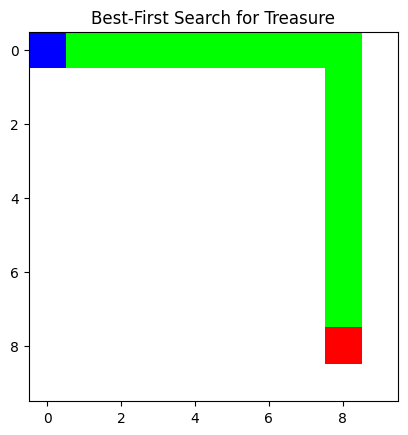

In [1]:
import heapq
import numpy as np
import matplotlib.pyplot as plt
import cv2

def generate_grid(size, treasure_pos):
    grid = np.zeros((size, size), dtype=int)
    for i in range(size):
        for j in range(size):
            grid[i, j] = abs(i - treasure_pos[0]) + abs(j - treasure_pos[1])
    return grid

def best_first_search(grid, start, treasure):
    rows, cols = grid.shape
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    priority_queue = [(grid[start], start, [start])]
    visited = set()
    
    while priority_queue:
        _, (x, y), path = heapq.heappop(priority_queue)
        
        if (x, y) == treasure:
            return path
        
        visited.add((x, y))
        
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and (nx, ny) not in visited:
                heapq.heappush(priority_queue, (grid[nx, ny], (nx, ny), path + [(nx, ny)]))
    
    return []

def visualize_search(grid, path, start, treasure):
    img = np.zeros((grid.shape[0], grid.shape[1], 3), dtype=np.uint8)
    img[grid > 0] = (255, 255, 255)
    
    for x, y in path:
        img[x, y] = (0, 255, 0)
    
    img[start] = (0, 0, 255)  # Start position (Red)
    img[treasure] = (255, 0, 0)  # Treasure position (Blue)
    
    plt.imshow(img)
    plt.title("Best-First Search for Treasure")
    plt.show()

if __name__ == "__main__":
    size = 10
    start = (0, 0)
    treasure = (8, 8)
    grid = generate_grid(size, treasure)
    
    path = best_first_search(grid, start, treasure)
    
    print(f"Path to treasure: {path}")
    visualize_search(grid, path, start, treasure)
